import all the library I needed in this experiment


In [42]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


Read the dataset

In [2]:
df = pd.read_csv('Data-3.csv')
df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_percentage_original,loss_quantity,activity,food_supply_stage,treatment,cause_of_loss,sample_size,method_data_collection,reference,url,notes
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,5.22%,68100,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,5.43%,65240,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,5.61%,61080,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,5.4%,55270,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,5%,51970,NaN,Whole supply chain,NaN,NaN,NaN,FAO's annual Agriculture Production Questionna...,FAO Sources,NaN,NaN


Drop some of the column that i think we do not need to use in this experiment.

### Checking number of records in each area type 

In [3]:
df.groupby('country')['country'].agg('count')

country
Afghanistan        29
Africa              1
Algeria             1
Angola            693
Argentina           3
                 ... 
Viet Nam           15
Western Africa      4
Western Asia        5
Zambia            728
Zimbabwe          472
Name: country, Length: 149, dtype: int64

In [4]:
df.groupby('commodity')['commodity'].agg('count')

commodity
Almonds, in shell                                                              15
Anise, badian, coriander, cumin, caraway, fennel and juniper berries, raw      28
Apple juice                                                                    19
Apples                                                                        152
Apricots                                                                       58
                                                                             ... 
Wheat                                                                        2052
Wheat and meslin flour                                                         50
Wine                                                                            1
Yams                                                                           46
Yautia                                                                         25
Name: commodity, Length: 195, dtype: int64

In [5]:
df.groupby('year')['year'].agg('count')

year
2000    1236
2001    1408
2002    1326
2003    1271
2004    1205
2005    1250
2006    1647
2007    1187
2008    1380
2009    1607
2010    1496
2011    1310
2012    1170
2013    1433
2014    1843
2015    1284
2016    1514
2017    1221
2018    1184
2019     913
2020     862
2021      26
Name: year, dtype: int64

Droping some colums which will not use for this model.

In [6]:
d2 = df.drop(['loss_percentage_original','activity','treatment','cause_of_loss','sample_size','url','notes'],axis='columns')
d2.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_quantity,food_supply_stage,method_data_collection,reference
0,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2009,5.22,68100,Whole supply chain,FAO's annual Agriculture Production Questionna...,FAO Sources
1,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2008,5.43,65240,Whole supply chain,FAO's annual Agriculture Production Questionna...,FAO Sources
2,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2007,5.61,61080,Whole supply chain,FAO's annual Agriculture Production Questionna...,FAO Sources
3,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2006,5.40,55270,Whole supply chain,FAO's annual Agriculture Production Questionna...,FAO Sources
4,104,Myanmar,NaN,0142,"Groundnuts, excluding shelled",2005,5.00,51970,Whole supply chain,FAO's annual Agriculture Production Questionna...,FAO Sources


In [7]:
df = d2
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27773 entries, 0 to 27772
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   m49_code                27773 non-null  int64  
 1   country                 27773 non-null  object 
 2   region                  871 non-null    object 
 3   cpc_code                27773 non-null  object 
 4   commodity               27773 non-null  object 
 5   year                    27773 non-null  int64  
 6   loss_percentage         27773 non-null  float64
 7   loss_quantity           4552 non-null   object 
 8   food_supply_stage       27724 non-null  object 
 9   method_data_collection  27418 non-null  object 
 10  reference               8436 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.3+ MB


In [8]:
df.isna().sum()

m49_code                      0
country                       0
region                    26902
cpc_code                      0
commodity                     0
year                          0
loss_percentage               0
loss_quantity             23221
food_supply_stage            49
method_data_collection      355
reference                 19337
dtype: int64

In [9]:
df=df.dropna()
df.isnull().sum()

m49_code                  0
country                   0
region                    0
cpc_code                  0
commodity                 0
year                      0
loss_percentage           0
loss_quantity             0
food_supply_stage         0
method_data_collection    0
reference                 0
dtype: int64

In [10]:
df.head()

,m49_code,country,region,cpc_code,commodity,year,loss_percentage,loss_quantity,food_supply_stage,method_data_collection,reference
13978,50,Bangladesh,Rangpur,0111,Wheat,2010,21.70,0.51kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13979,50,Bangladesh,Rangpur,0111,Wheat,2010,13.62,0.32kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13982,50,Bangladesh,Rangpur,0111,Wheat,2010,13.62,0.32kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13983,50,Bangladesh,Rangpur,0111,Wheat,2010,40.85,0.96kg/quintal,Harvest,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13984,50,Bangladesh,Rangpur,0111,Wheat,2010,5.53,0.13kg/quintal,Transport,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...


In [11]:
X = df.drop(['loss_percentage'],axis='columns')


In [12]:
X.head()

,m49_code,country,region,cpc_code,commodity,year,loss_quantity,food_supply_stage,method_data_collection,reference
13978,50,Bangladesh,Rangpur,0111,Wheat,2010,0.51kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13979,50,Bangladesh,Rangpur,0111,Wheat,2010,0.32kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13982,50,Bangladesh,Rangpur,0111,Wheat,2010,0.32kg/quintal,Farm,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13983,50,Bangladesh,Rangpur,0111,Wheat,2010,0.96kg/quintal,Harvest,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...
13984,50,Bangladesh,Rangpur,0111,Wheat,2010,0.13kg/quintal,Transport,Survey,Esmat Ara Begum et al. / IJAR-BAE (July 2012) ...


In [13]:
y = df.loss_percentage


In [14]:
y.head()

13978    21.70
13979    13.62
13982    13.62
13983    40.85
13984     5.53
Name: loss_percentage, dtype: float64

In [15]:
print(df.dtypes)

m49_code                    int64
country                    object
region                     object
cpc_code                   object
commodity                  object
year                        int64
loss_percentage           float64
loss_quantity              object
food_supply_stage          object
method_data_collection     object
reference                  object
dtype: object


In [16]:
# Encode labels of independent variable columns
cols = ['m49_code','country', 'region', 'cpc_code', 'commodity','year', 'loss_quantity', 'food_supply_stage', 'method_data_collection', 'reference']
X[cols] = X[cols].apply(LabelEncoder().fit_transform)




In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)  


LinearRegression()

In [18]:
model.score(X, y)

0.6315498089740754

In [19]:
y_pred = model.predict(X)

In [20]:
import sklearn.metrics as metrics

In [21]:
mean_absolute_error=metrics.mean_absolute_error(y,y_pred)

In [22]:
print('Mae (Mean absolute error): %s' %mean_absolute_error)

Mae (Mean absolute error): 2.9059935945810897


In [23]:
mean_squared_error=metrics.mean_squared_error(y,y_pred)

In [24]:
print('Mae (Mean absolute error): %s' %mean_squared_error)

Mae (Mean absolute error): 27.876125986505905


# Visualization examples

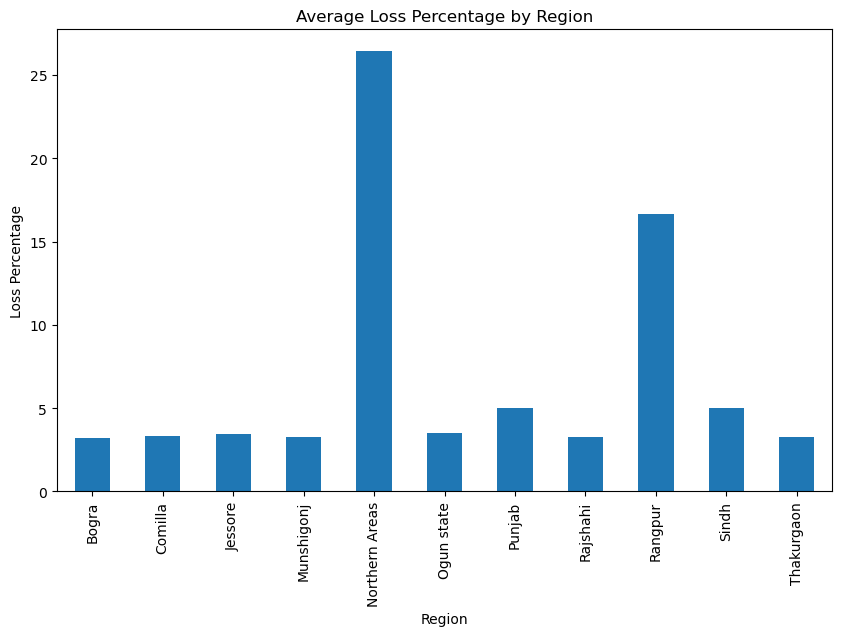

In [25]:
# Bar plot: Loss percentage by region
plt.figure(figsize=(10, 6))
df.groupby('region')['loss_percentage'].mean().plot(kind='bar')
plt.title('Average Loss Percentage by Region')
plt.xlabel('Region')
plt.ylabel('Loss Percentage')
plt.show()

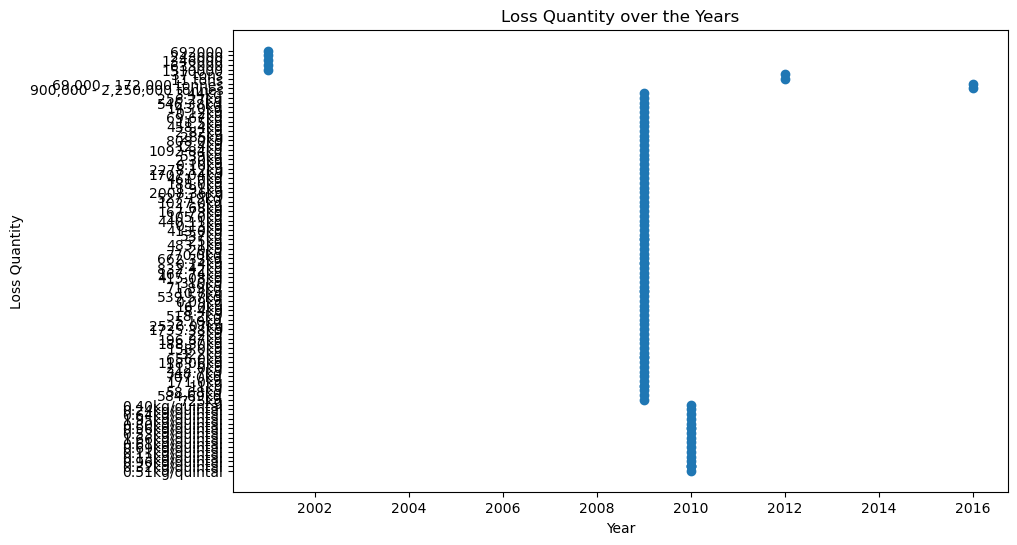

In [26]:
# Scatter plot: Loss quantity vs. year
plt.figure(figsize=(10, 6))
plt.scatter(df['year'], df['loss_quantity'])
plt.title('Loss Quantity over the Years')
plt.xlabel('Year')
plt.ylabel('Loss Quantity')
plt.show()

<Figure size 1000x600 with 0 Axes>

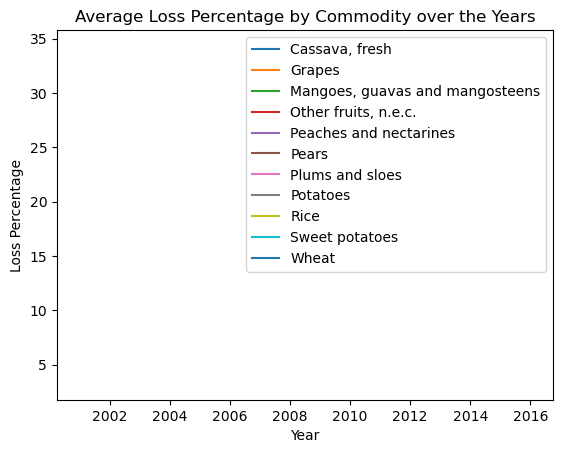

In [28]:
# Line plot: Loss percentage by commodity over the years
plt.figure(figsize=(10, 6))
df.pivot_table(index='year', columns='commodity', values='loss_percentage', aggfunc='mean').plot()
plt.title('Average Loss Percentage by Commodity over the Years')
plt.xlabel('Year')
plt.ylabel('Loss Percentage')
plt.legend(loc='upper right')
plt.show()

<Figure size 1000x600 with 0 Axes>

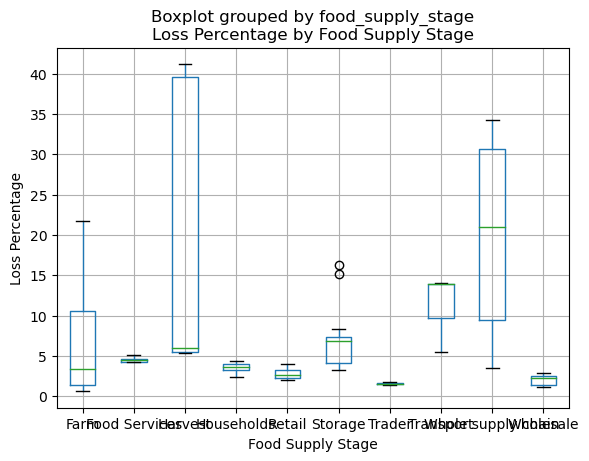

In [29]:
# Box plot: Loss percentage by food supply stage
plt.figure(figsize=(10, 6))
df.boxplot(column='loss_percentage', by='food_supply_stage')
plt.title('Loss Percentage by Food Supply Stage')
plt.xlabel('Food Supply Stage')
plt.ylabel('Loss Percentage')
plt.show()

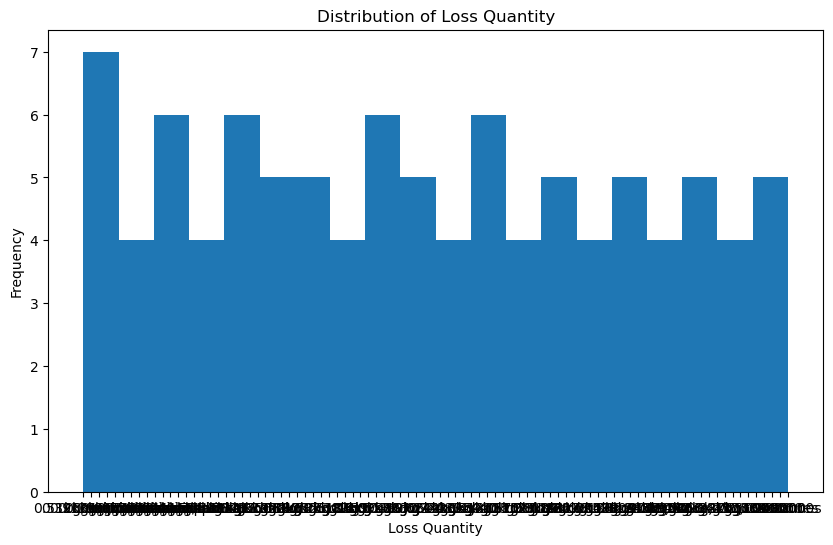

In [30]:
# Histogram: Distribution of loss quantity
plt.figure(figsize=(10, 6))
plt.hist(df['loss_quantity'], bins=20)
plt.title('Distribution of Loss Quantity')
plt.xlabel('Loss Quantity')
plt.ylabel('Frequency')
plt.show()

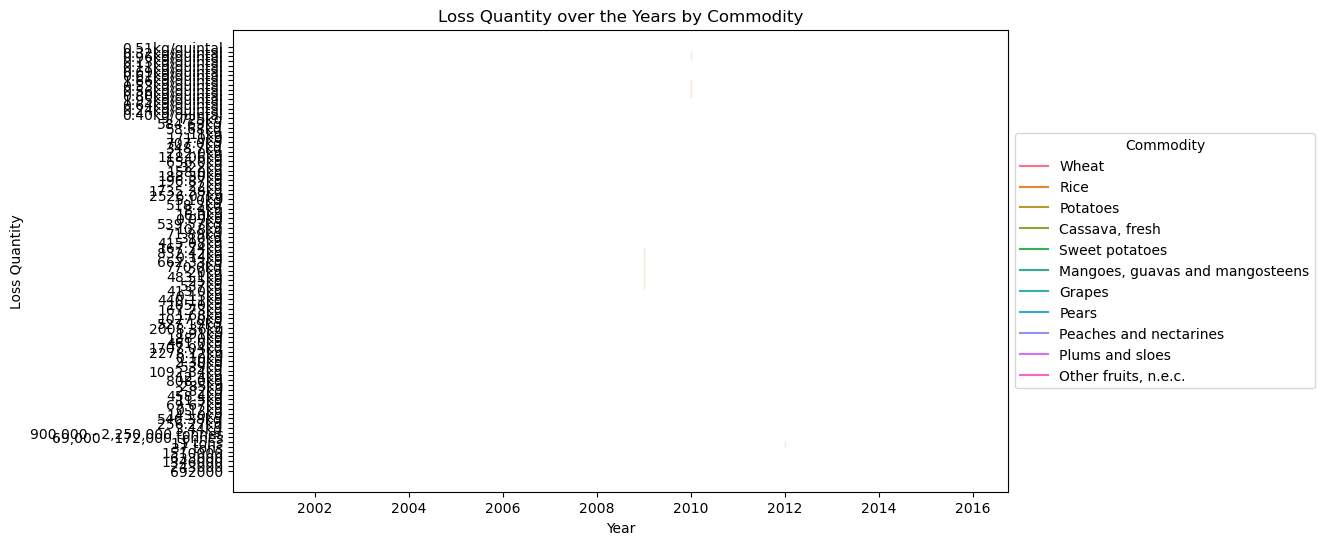

In [43]:
# Line plot: Loss quantity over the years by commodity
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='loss_quantity', hue='commodity', data=df)
plt.title('Loss Quantity over the Years by Commodity')
plt.xlabel('Year')
plt.ylabel('Loss Quantity')
plt.legend(title='Commodity', loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

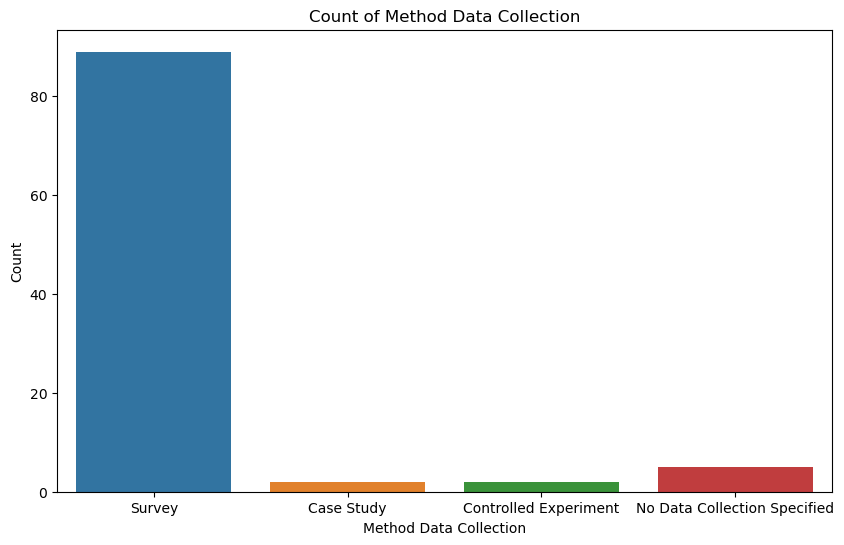

In [44]:
# Count plot: Method data collection
plt.figure(figsize=(10, 6))
sns.countplot(x='method_data_collection', data=df)
plt.title('Count of Method Data Collection')
plt.xlabel('Method Data Collection')
plt.ylabel('Count')
plt.show()

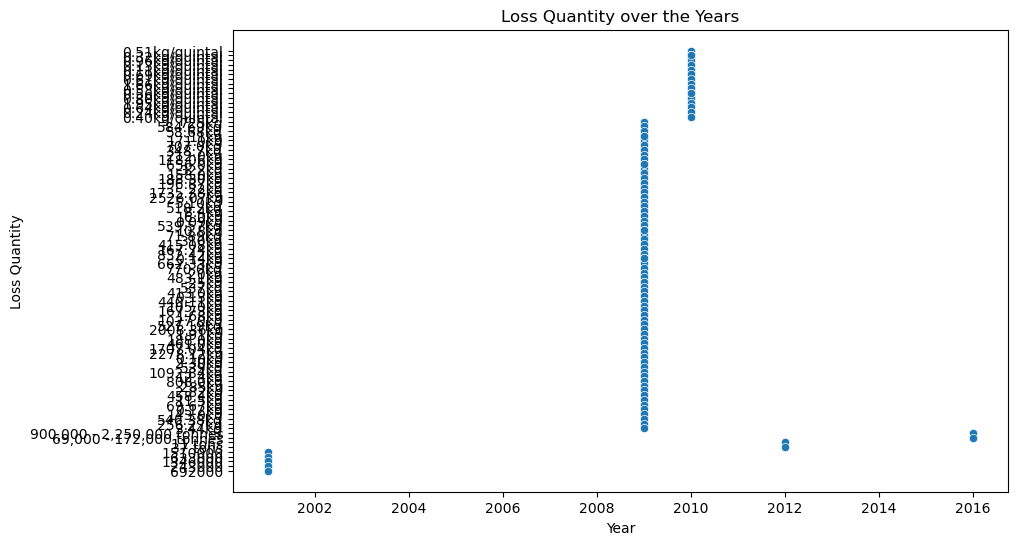

In [46]:
# Scatter plot: Loss quantity vs. year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='loss_quantity', data=df)
plt.title('Loss Quantity over the Years')
plt.xlabel('Year')
plt.ylabel('Loss Quantity')
plt.show()


In [ ]:
# Bar plot: Loss quantity by country
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='loss_quantity', data=df)
plt.title('Loss Quantity by Country')
plt.xlabel('Country')
plt.ylabel('Loss Quantity')
plt.xticks(rotation=90)
plt.show()